In [70]:
#грузим датасет
import pandas as pd
df = pd.read_csv('C://Users/Uldum/Downloads/churn_train.txt', delimiter='\t')

In [71]:
df.head(10)

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
0,20201,2,38,21,"2,73",Moscow,Online,345,1,1,1,70000.0,0
1,42943,2,30,21,"2,80",Moscow,Branch,269,1,1,1,30000.0,0
2,27570,1,48,13,"2,80",Regions,Online,327,1,1,1,150000.0,1
3,25037,3,40,15,"2,68",Moscow,Online,0,1,1,1,30000.0,0
4,47546,2,20,21,"2,88",Saint-Petersbourgh,Branch,0,1,1,0,190000.0,0
5,36605,1,32,16,"2,77",Regions,Branch,347,2,1,1,160000.0,0
6,39087,2,42,18,"2,79",Moscow,Online,0,3,0,0,60000.0,1
7,29161,3,28,20,"2,81",Regions,Branch,301,1,1,1,150000.0,0
8,32972,1,26,16,"2,82",Saint-Petersbourgh,Online,374,1,1,0,40000.0,0
9,23597,1,32,12,"2,80",Moscow,Online,0,2,1,1,30000.0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8305 entries, 0 to 8304
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            8305 non-null   int64  
 1   month_number         8305 non-null   int64  
 2   age                  8305 non-null   int64  
 3   lifetime             8305 non-null   int64  
 4   beh_score            8305 non-null   object 
 5   region               8305 non-null   object 
 6   channel              8305 non-null   object 
 7   avg_transaction_sum  8305 non-null   int64  
 8   total_products       8305 non-null   int64  
 9   deposit              8305 non-null   int64  
 10  is_package           8305 non-null   int64  
 11  salary_bucket        8304 non-null   float64
 12  churn                8305 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 843.6+ KB


In [73]:
df.duplicated().unique()

array([False])

In [74]:
df.isna().sum()

client_id              0
month_number           0
age                    0
lifetime               0
beh_score              0
region                 0
channel                0
avg_transaction_sum    0
total_products         0
deposit                0
is_package             0
salary_bucket          1
churn                  0
dtype: int64

In [75]:
df['salary_bucket'] = df['salary_bucket'].fillna(df.loc[:, 'salary_bucket'].mean())
df.isna().sum()

client_id              0
month_number           0
age                    0
lifetime               0
beh_score              0
region                 0
channel                0
avg_transaction_sum    0
total_products         0
deposit                0
is_package             0
salary_bucket          0
churn                  0
dtype: int64

In [76]:
df['beh_score'].value_counts()

2,81    506
2,83    500
2,85    492
2,84    492
2,82    486
2,80    485
2,78    421
2,79    400
2,86    389
2,87    365
2,77    352
2,88    347
2,76    330
2,89    294
2,75    263
2,74    245
2,93    238
2,73    232
2,90    220
2,72    214
2,71    167
2,91    161
2,70    140
2,92    113
2,69    102
2,68     81
2,67     70
2,66     50
2,65     43
2,64     31
2,63     29
2,62     17
2,61     14
2,54      5
2,56      3
2,58      3
2,60      3
2,57      1
2,55      1
Name: beh_score, dtype: int64

In [77]:
df['beh_score'] = df['beh_score'].apply(lambda x: float(x.replace(',','.')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8305 entries, 0 to 8304
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            8305 non-null   int64  
 1   month_number         8305 non-null   int64  
 2   age                  8305 non-null   int64  
 3   lifetime             8305 non-null   int64  
 4   beh_score            8305 non-null   float64
 5   region               8305 non-null   object 
 6   channel              8305 non-null   object 
 7   avg_transaction_sum  8305 non-null   int64  
 8   total_products       8305 non-null   int64  
 9   deposit              8305 non-null   int64  
 10  is_package           8305 non-null   int64  
 11  salary_bucket        8305 non-null   float64
 12  churn                8305 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 843.6+ KB


In [78]:
df['region'].value_counts()

Moscow                4163
Regions               2076
Saint-Petersbourgh    2066
Name: region, dtype: int64

In [79]:
df['channel'].value_counts()

Online    4537
Branch    3768
Name: channel, dtype: int64

In [159]:
df_dum = pd.get_dummies(df)
df_dum.head(10)

,client_id,month_number,age,lifetime,beh_score,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn,region_Moscow,region_Regions,region_Saint-Petersbourgh,channel_Branch,channel_Online
0,20201,2,38,21,2.73,345,1,1,1,70000.0,0,1,0,0,0,1
1,42943,2,30,21,2.80,269,1,1,1,30000.0,0,1,0,0,1,0
2,27570,1,48,13,2.80,327,1,1,1,150000.0,1,0,1,0,0,1
3,25037,3,40,15,2.68,0,1,1,1,30000.0,0,1,0,0,0,1
4,47546,2,20,21,2.88,0,1,1,0,190000.0,0,0,0,1,1,0
5,36605,1,32,16,2.77,347,2,1,1,160000.0,0,0,1,0,1,0
6,39087,2,42,18,2.79,0,3,0,0,60000.0,1,1,0,0,0,1
7,29161,3,28,20,2.81,301,1,1,1,150000.0,0,0,1,0,1,0
8,32972,1,26,16,2.82,374,1,1,0,40000.0,0,0,0,1,0,1
9,23597,1,32,12,2.80,0,2,1,1,30000.0,0,1,0,0,0,1


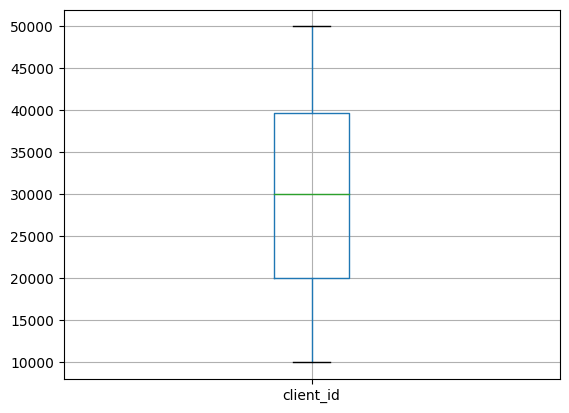

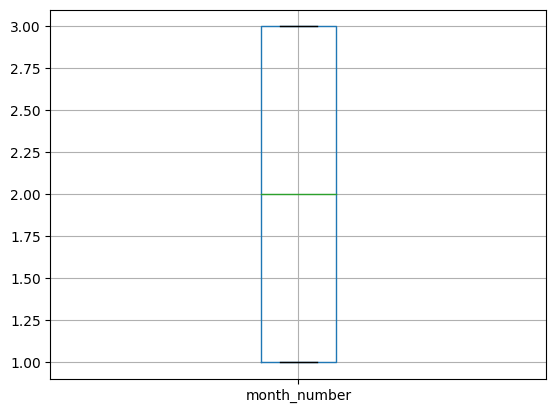

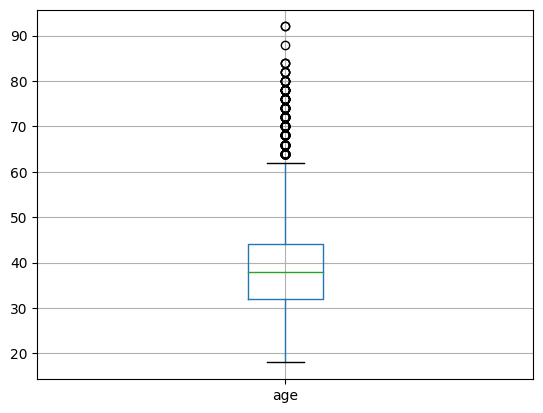

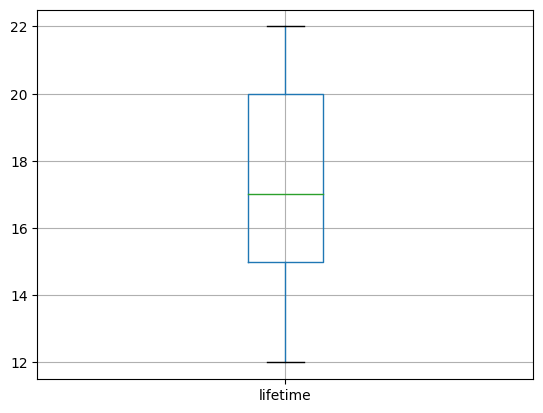

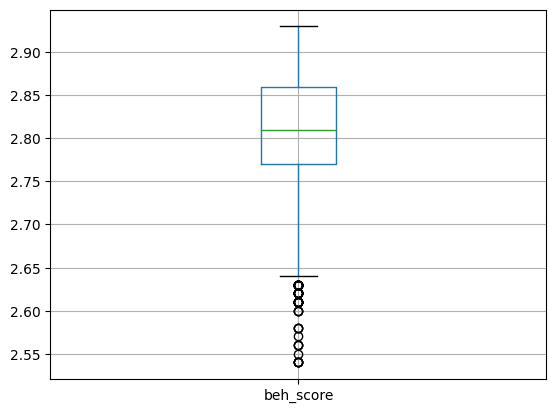

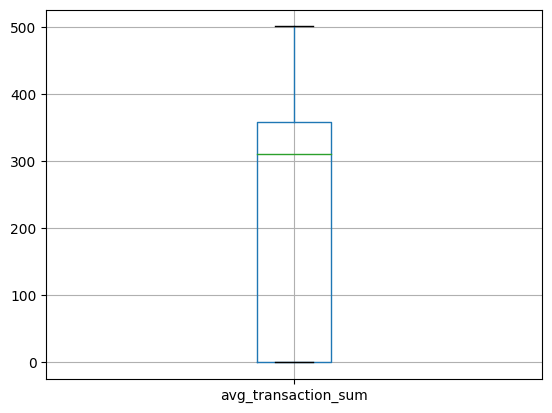

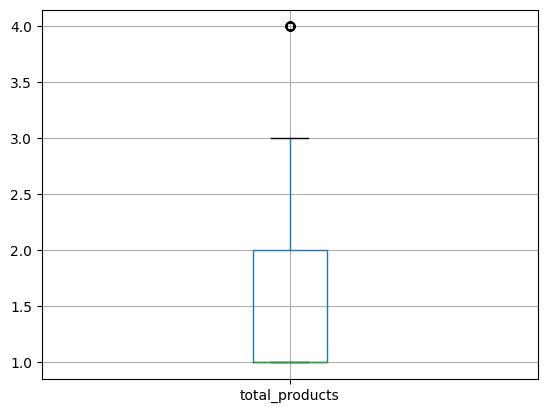

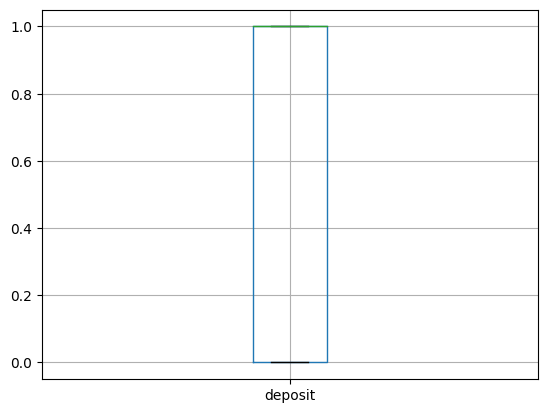

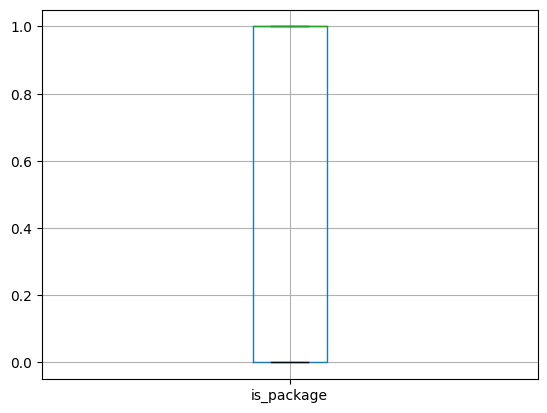

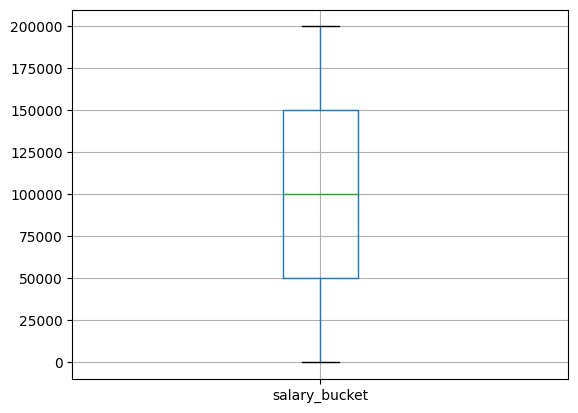

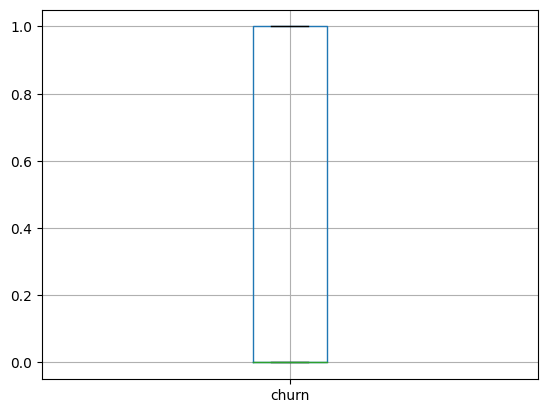

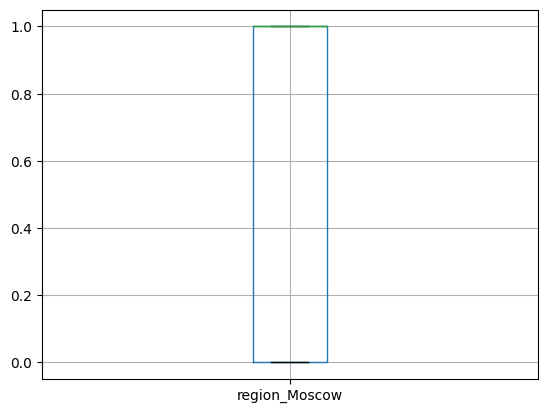

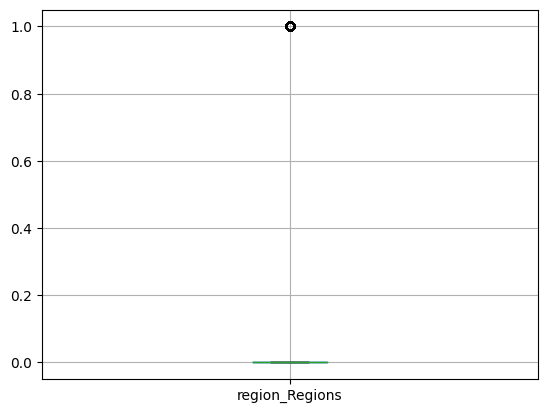

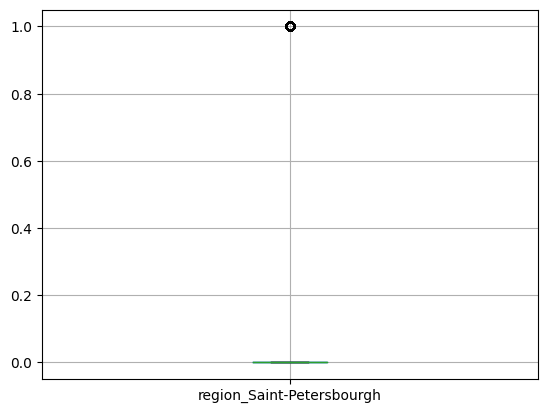

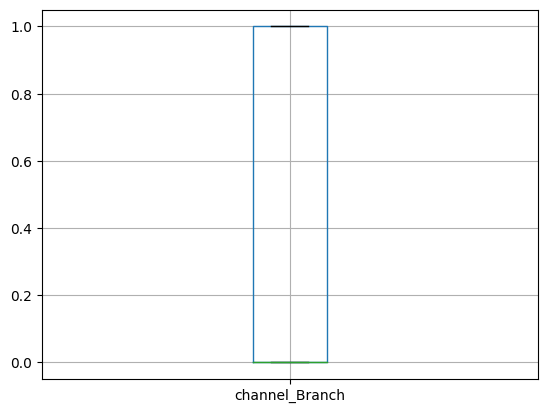

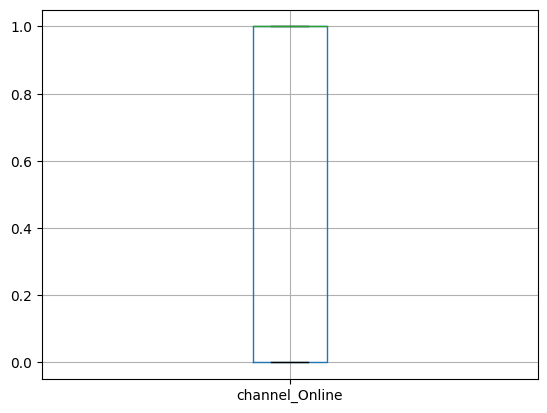

In [160]:
import matplotlib.pyplot as plt

for column in df_dum:
    try:
        plt.figure()
        df_dum.boxplot([column])
    except:
        print("Smth wrong")


In [161]:
for column in ['age', 'beh_score', 'total_products']:
  limiter = df_dum[column].quantile(0.99)
  df_dum = df_dum[df_dum[column]<=limiter]

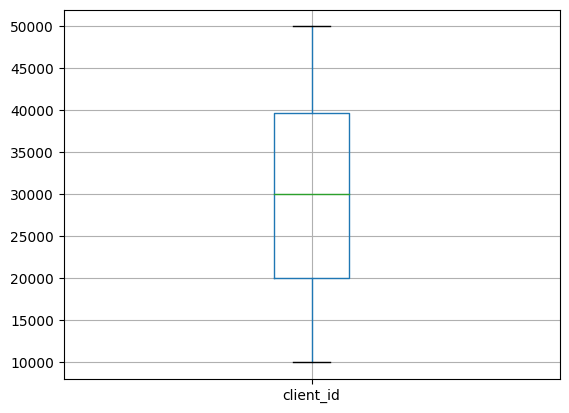

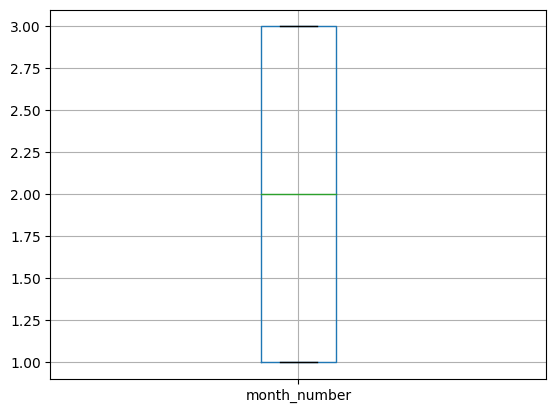

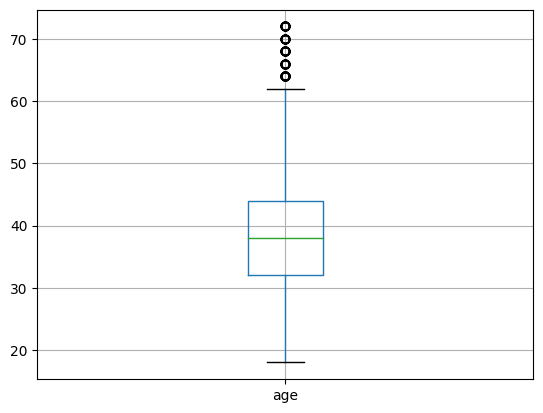

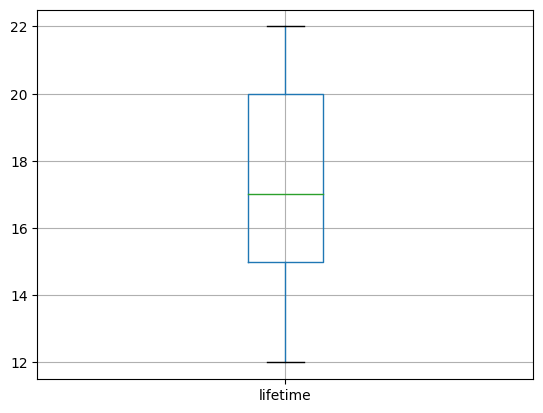

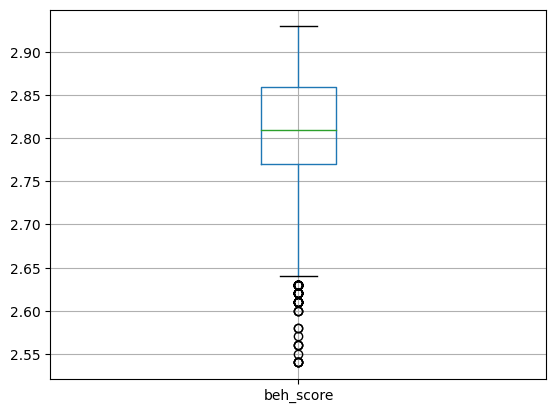

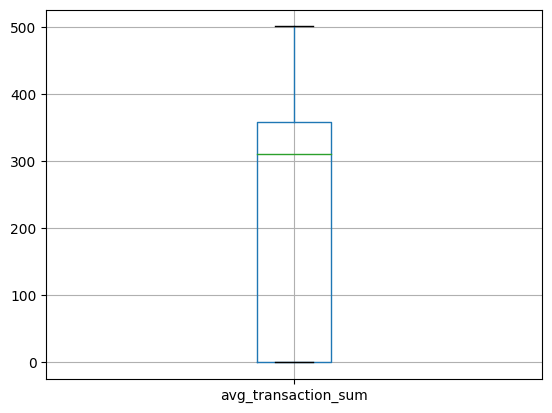

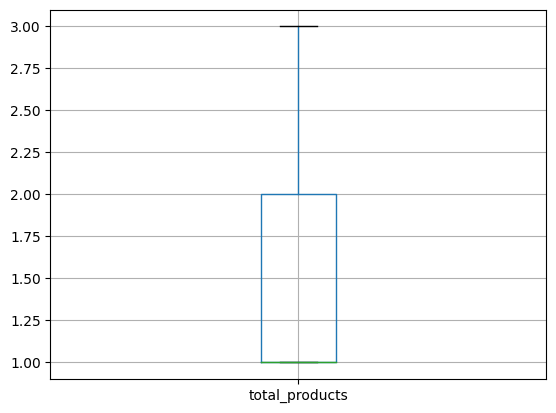

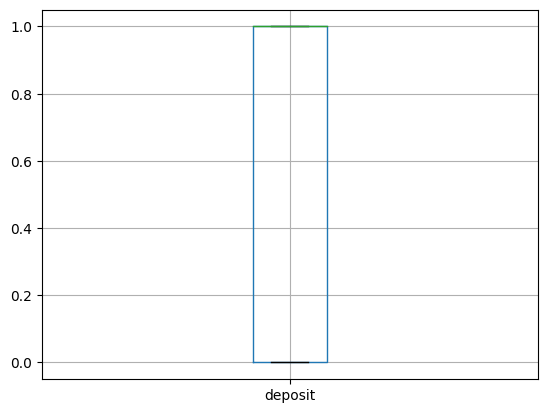

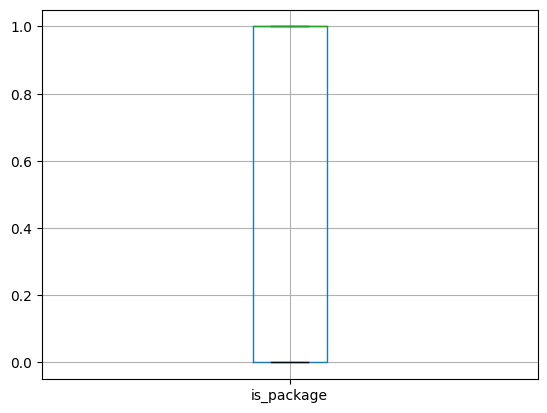

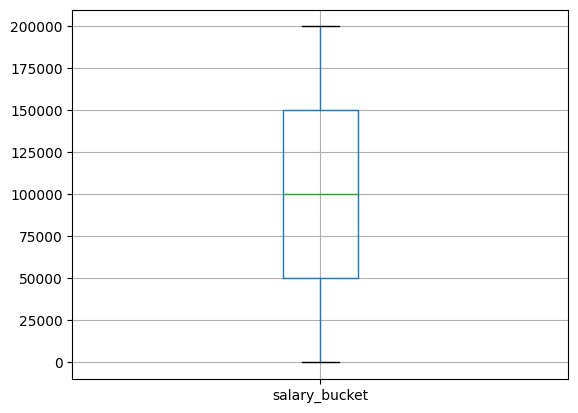

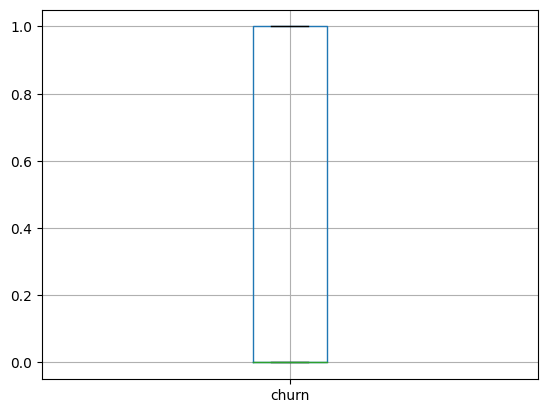

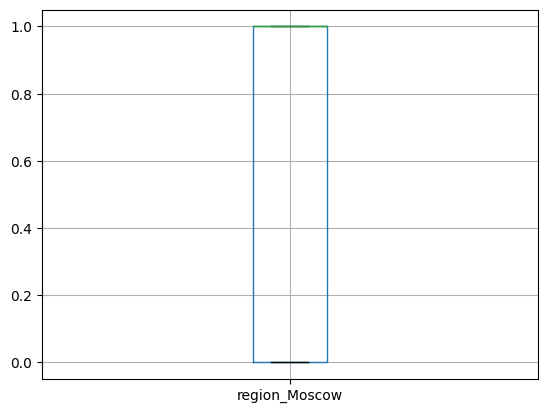

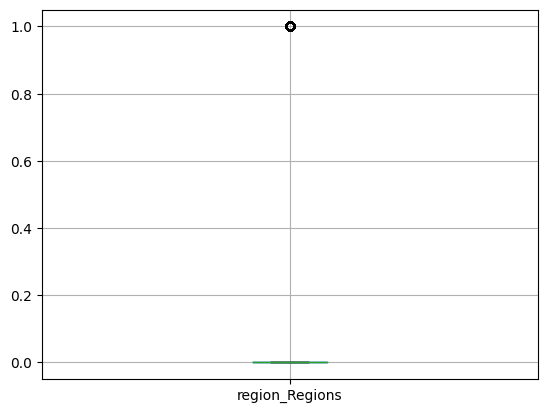

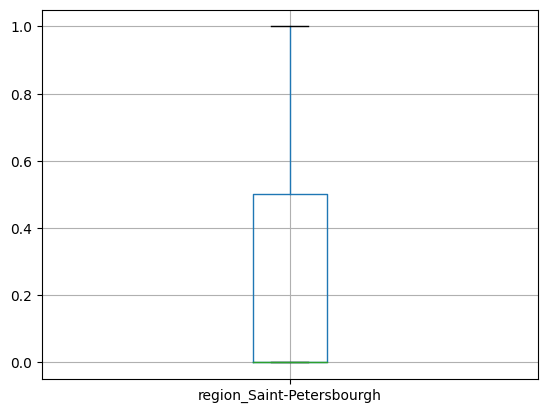

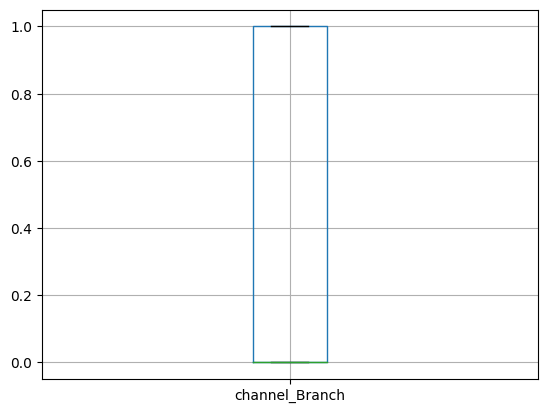

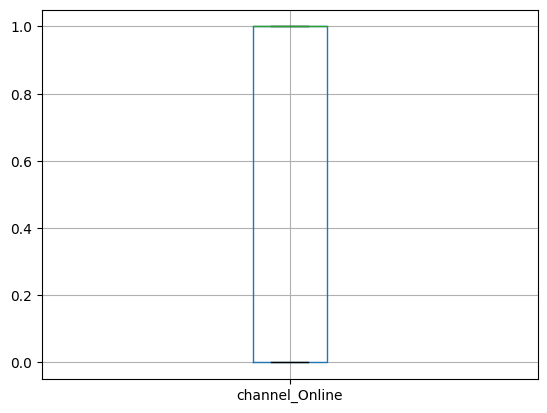

In [162]:
for column in df_dum:
    try:
        plt.figure()
        df_dum.boxplot([column])
    except:
        print("Smth wrong")

In [163]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8183 entries, 0 to 8304
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   client_id                  8183 non-null   int64  
 1   month_number               8183 non-null   int64  
 2   age                        8183 non-null   int64  
 3   lifetime                   8183 non-null   int64  
 4   beh_score                  8183 non-null   float64
 5   avg_transaction_sum        8183 non-null   int64  
 6   total_products             8183 non-null   int64  
 7   deposit                    8183 non-null   int64  
 8   is_package                 8183 non-null   int64  
 9   salary_bucket              8183 non-null   float64
 10  churn                      8183 non-null   int64  
 11  region_Moscow              8183 non-null   uint8  
 12  region_Regions             8183 non-null   uint8  
 13  region_Saint-Petersbourgh  8183 non-null   uint8

In [164]:
df_norm = df_dum.drop(['client_id', 'churn'], axis=1)

In [165]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
scaler.fit(df_norm)
df_scale = pd.DataFrame(scaler.transform(df_norm), columns = df_norm.columns)
df_scale.head(10)

,month_number,age,lifetime,beh_score,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,region_Moscow,region_Regions,region_Saint-Petersbourgh,channel_Branch,channel_Online
0,-0.003168,-0.103469,1.372645,-1.184616,0.748642,-0.946354,0.648393,0.971445,-0.520747,0.997193,-0.575140,-0.577397,-0.909603,0.909603
1,-0.003168,-0.910608,1.372645,-0.130329,0.299750,-0.946354,0.648393,0.971445,-1.216892,0.997193,-0.575140,-0.577397,1.099380,-1.099380
2,-1.237496,0.905454,-1.389183,-0.130329,0.642326,-0.946354,0.648393,0.971445,0.871543,-1.002815,1.738708,-0.577397,-0.909603,0.909603
3,1.231161,0.098315,-0.698726,-1.937678,-1.289090,-0.946354,0.648393,0.971445,-1.216892,0.997193,-0.575140,-0.577397,-0.909603,0.909603
4,-0.003168,-1.919531,1.372645,1.074569,-1.289090,-0.946354,0.648393,-1.029394,1.567688,-1.002815,-0.575140,1.731910,1.099380,-1.099380
5,-1.237496,-0.708823,-0.353497,-0.582167,0.760455,0.871489,0.648393,0.971445,1.045579,-1.002815,1.738708,-0.577397,1.099380,-1.099380
6,-0.003168,0.300100,0.336960,-0.280942,-1.289090,2.689332,-1.542275,-1.029394,-0.694784,0.997193,-0.575140,-0.577397,-0.909603,0.909603
7,1.231161,-1.112392,1.027416,0.020283,0.488757,-0.946354,0.648393,0.971445,0.871543,-1.002815,1.738708,-0.577397,1.099380,-1.099380
8,-1.237496,-1.314177,-0.353497,0.170895,0.919930,-0.946354,0.648393,-1.029394,-1.042856,-1.002815,-0.575140,1.731910,-0.909603,0.909603
9,-1.237496,-0.708823,-1.734411,-0.130329,-1.289090,0.871489,0.648393,0.971445,-1.216892,0.997193,-0.575140,-0.577397,-0.909603,0.909603


In [166]:
df_norm = pd.DataFrame(normalize(df_scale), columns = df_scale.columns)
df_norm.head(10)

,month_number,age,lifetime,beh_score,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,region_Moscow,region_Regions,region_Saint-Petersbourgh,channel_Branch,channel_Online
0,-0.001017,-0.033217,0.440665,-0.380301,0.240339,-0.303811,0.208156,0.311866,-0.167177,0.320132,-0.184639,-0.185364,-0.292013,0.292013
1,-0.000971,-0.279210,0.420879,-0.039961,0.091909,-0.290170,0.198810,0.297863,-0.373122,0.305758,-0.176349,-0.177041,0.337091,-0.337091
2,-0.333767,0.244211,-0.374678,-0.035151,0.173242,-0.255242,0.174879,0.262010,0.235065,-0.270470,0.468949,-0.155730,-0.245330,0.245330
3,0.323499,0.025833,-0.183597,-0.509143,-0.338720,-0.248663,0.170371,0.255256,-0.319750,0.262022,-0.151123,-0.151717,-0.239007,0.239007
4,-0.000709,-0.429524,0.307150,0.240451,-0.288453,-0.211761,0.145088,-0.230342,0.350794,-0.224395,-0.128696,0.387541,0.246003,-0.246003
5,-0.342270,-0.196048,-0.097771,-0.161017,0.210329,0.241039,0.179334,0.268685,0.289189,-0.277361,0.480896,-0.159698,0.304069,-0.304069
6,-0.000782,0.074079,0.083178,-0.069350,-0.318210,0.663858,-0.380709,-0.254105,-0.171506,0.246156,-0.141972,-0.142530,-0.224534,0.224534
7,0.330858,-0.298940,0.276104,0.005451,0.131347,-0.254319,0.174247,0.261062,0.234215,-0.269493,0.467254,-0.155168,0.295443,-0.295443
8,-0.334181,-0.354888,-0.095460,0.046150,0.248423,-0.255559,0.175096,-0.277983,-0.281619,-0.270806,-0.155314,0.467695,-0.245634,0.245634
9,-0.335089,-0.191935,-0.469644,-0.035291,-0.349060,0.235982,0.175572,0.263048,-0.329510,0.270020,-0.155736,-0.156348,-0.246302,0.246302


<AxesSubplot: >

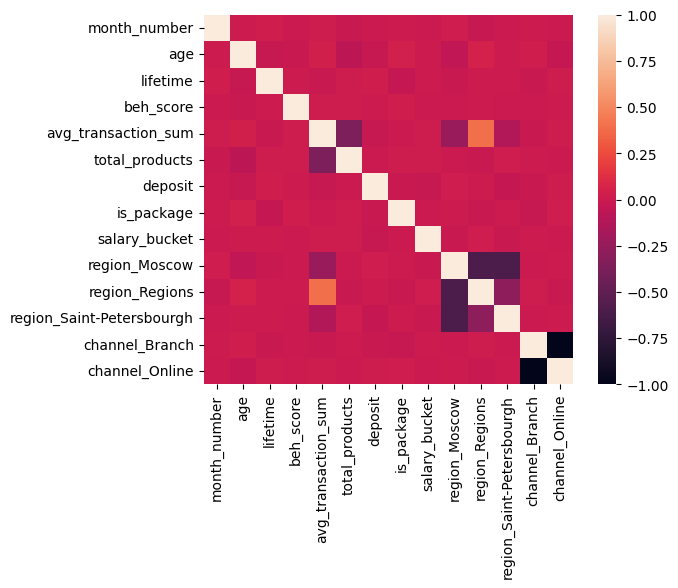

In [167]:
import seaborn as sns

cor = df_norm.corr()
sns.heatmap(cor, square = True)

array([[<AxesSubplot: title={'center': 'month_number'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'lifetime'}>,
        <AxesSubplot: title={'center': 'beh_score'}>],
       [<AxesSubplot: title={'center': 'avg_transaction_sum'}>,
        <AxesSubplot: title={'center': 'total_products'}>,
        <AxesSubplot: title={'center': 'deposit'}>,
        <AxesSubplot: title={'center': 'is_package'}>],
       [<AxesSubplot: title={'center': 'salary_bucket'}>,
        <AxesSubplot: title={'center': 'region_Moscow'}>,
        <AxesSubplot: title={'center': 'region_Regions'}>,
        <AxesSubplot: title={'center': 'region_Saint-Petersbourgh'}>],
       [<AxesSubplot: title={'center': 'channel_Branch'}>,
        <AxesSubplot: title={'center': 'channel_Online'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

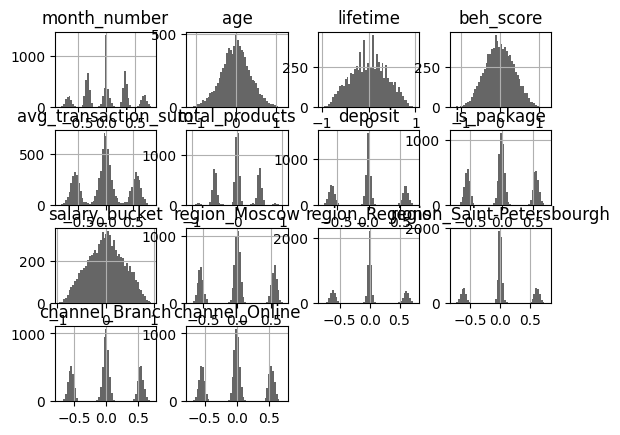

In [168]:
df_norm.diff().hist(color="k", alpha=0.6, bins=50)

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_norm 
y = df_dum.churn        
y  

0       0
1       0
2       1
3       0
4       0
       ..
8299    1
8301    0
8302    0
8303    1
8304    0
Name: churn, Length: 8183, dtype: int64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

In [ ]:
#RandomForestClassifier 0.4/0.7 age, total_products, is_package, avg_transaction_sum, regions_reg, salary_bucket

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=34, n_jobs=-1)
parametrs = {'n_estimators': range(10, 101, 10), 'criterion': ['entropy'],
             'max_depth': range(1, 13, 2), 'min_samples_split': range(2, 10, 2), 'min_samples_leaf': range(1, 8)}

In [173]:
gs_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1)
gs_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=34),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 101, 10)})

In [174]:
from sklearn.metrics import f1_score

f1_score(y_test, gs_cv_clf.best_estimator_.predict(X_test))     

0.401840490797546

In [175]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, gs_cv_clf.best_estimator_.predict_proba(X_test)[:, 1])

0.6977950689590717

<AxesSubplot: >

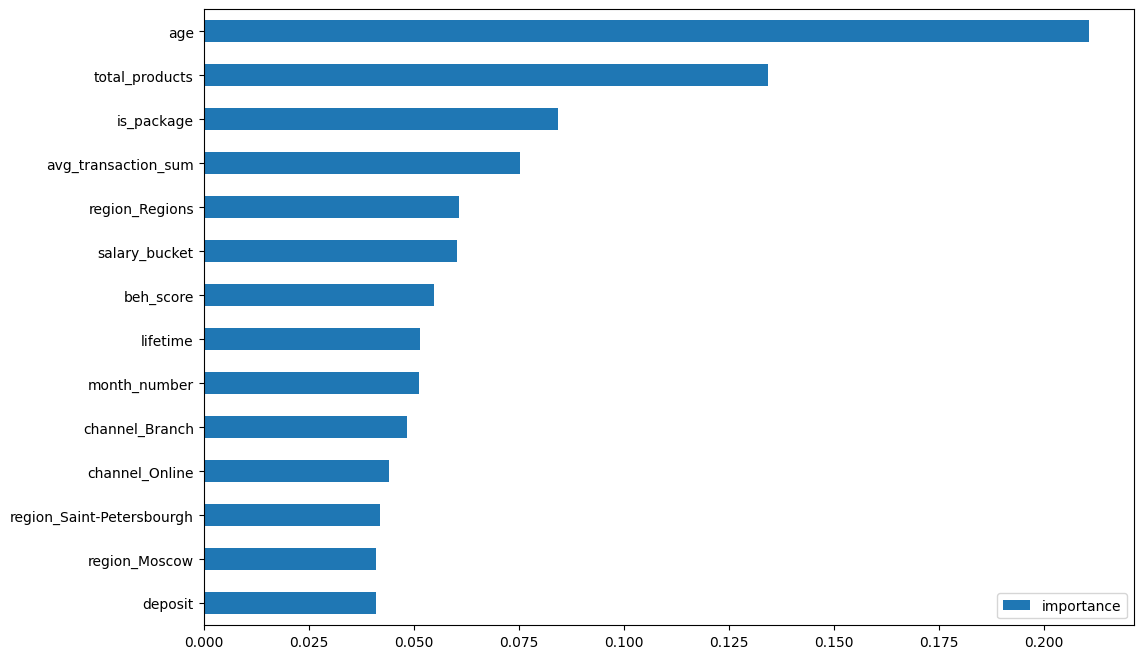

In [177]:
imp = pd.DataFrame(gs_cv_clf.best_estimator_.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [178]:
best_clf = gs_cv_clf.best_estimator_
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
fi_df_sort

,features,feature_importances
1,age,0.210850
5,total_products,0.134363
7,is_package,0.084282
4,avg_transaction_sum,0.075263
10,region_Regions,0.060796
8,salary_bucket,0.060422
3,beh_score,0.054859
2,lifetime,0.051477
0,month_number,0.051360
12,channel_Branch,0.048338


In [ ]:
#ExtraTreesClassifier 0.43/0.71 age, total_products, is_package, avg_transaction_sum, lifetime, month_num, reg_reg, sal_buck

In [179]:
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier(n_estimators=100, max_features= 168, criterion= 'entropy', min_samples_split= 3,
                            max_depth= 30, min_samples_leaf= 8)      
extc.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=30, max_features=168,
                     min_samples_leaf=8, min_samples_split=3)

In [222]:
f1_score(y_test, extc.predict(X_test))

0.4347826086956522

In [223]:
roc_auc_score(y_test, extc.predict_proba(X_test)[:, 1])

0.7105551544294704

<AxesSubplot: >

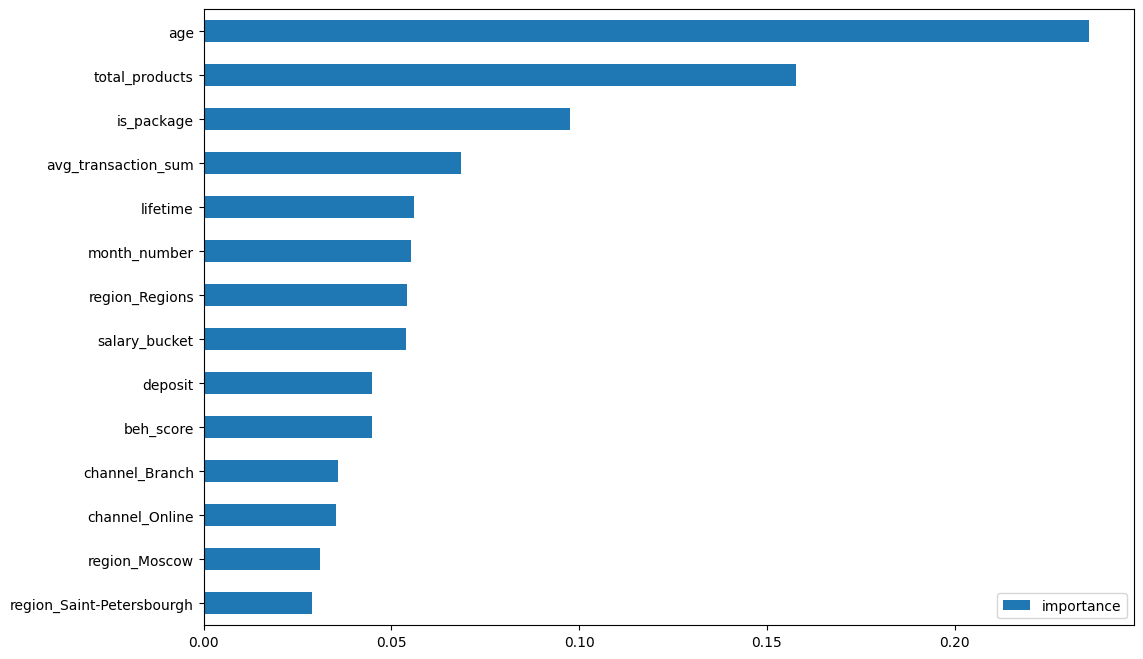

In [183]:
imp = pd.DataFrame(extc.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [184]:
feature_importances = extc.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
fi_df_sort

,features,feature_importances
1,age,0.235896
5,total_products,0.157736
7,is_package,0.097662
4,avg_transaction_sum,0.068594
2,lifetime,0.056055
0,month_number,0.055266
10,region_Regions,0.054221
8,salary_bucket,0.053853
6,deposit,0.044837
3,beh_score,0.044766


In [ ]:
#DecisionTreeClassifier age, total_products, is_package, avg_transaction_sum

In [185]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=19)
parametrs = {'criterion': ['entropy'], 'max_depth': range(1, 13, 2), 'min_samples_split': range(2, 10, 2),
             'min_samples_leaf': range(1, 8)}

In [186]:
gs_clf_tree = GridSearchCV(clf_tree, parametrs, cv=5, n_jobs=-1)
gs_clf_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=19), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [187]:
f1_score(y_test, gs_clf_tree.best_estimator_.predict(X_test))

0.302405498281787

In [188]:
roc_auc_score(y_test, gs_clf_tree.best_estimator_.predict_proba(X_test)[:, 1])

0.6737537704833917

<AxesSubplot: >

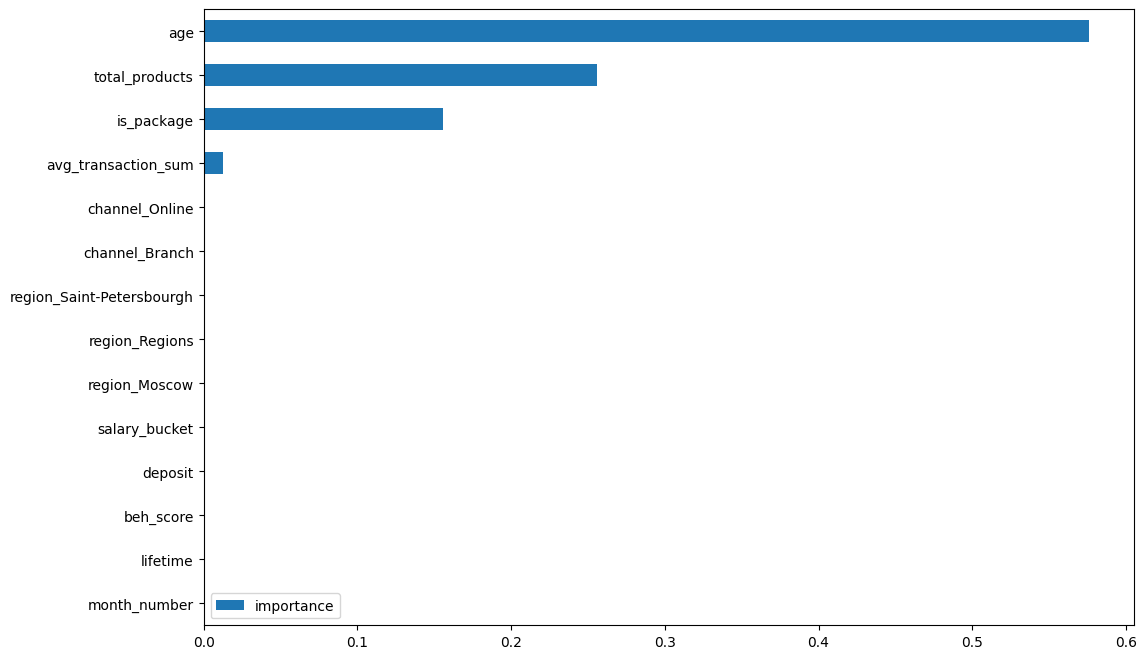

In [190]:
imp = pd.DataFrame(gs_clf_tree.best_estimator_.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [191]:
best_clf = gs_clf_tree.best_estimator_
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
fi_df_sort

,features,feature_importances
1,age,0.576112
5,total_products,0.255915
7,is_package,0.155414
4,avg_transaction_sum,0.012559
0,month_number,0.000000
2,lifetime,0.000000
3,beh_score,0.000000
6,deposit,0.000000
8,salary_bucket,0.000000
9,region_Moscow,0.000000


In [ ]:
#LogisticRegression >age -> 1, <is_package -> 0

In [192]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=12)

In [211]:
logreg1 = LogisticRegression(solver='liblinear', random_state=12)

In [212]:
logreg1.fit(X, y) 

LogisticRegression(random_state=12, solver='liblinear')

In [194]:
f1_score(y_test, logreg.predict(X_test))

0.24620573355817874

In [195]:
roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

0.6632147425442471

In [196]:
roc_auc_score(y_test, logreg.decision_function(X_test))

0.6632147425442471

In [197]:
print(logreg.coef_)

[[ 0.11058668  2.2066092  -0.03075537 -0.21465786  0.24466819 -0.52744485
  -0.04663288 -1.02404383 -0.05829235 -0.26671708  0.57008185 -0.26099845
   0.29810035 -0.29810035]]


In [213]:
print(logreg1.coef_)

[[ 0.15178152  2.0853694  -0.03523449 -0.17935751  0.23441223 -0.54423498
  -0.04033393 -1.0178784  -0.00928314 -0.22944473  0.56116501 -0.29513559
   0.29544092 -0.29544092]]


In [ ]:
#GradientBoostingClassifier 0.4/0.7 age, total_products, is_package, reg_reg, avg_transact_sum

In [198]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

classifiergb = GradientBoostingClassifier(learning_rate=0.01,random_state=13)

parameters_gb = [{'n_estimators': [50,100,200,300,500]}] 
grid_search_gb = GridSearchCV(estimator = classifiergb,
                           param_grid = parameters_gb,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  random_state=13),
             n_jobs=-1, param_grid=[{'n_estimators': [50, 100, 200, 300, 500]}],
             scoring='accuracy')

In [199]:
f1_score(y_test, grid_search_gb.best_estimator_.predict(X_test))

0.403125

In [200]:
roc_auc_score(y_test, grid_search_gb.best_estimator_.predict_proba(X_test)[:, 1])

0.7085979849217314

In [201]:
roc_auc_score(y_test, grid_search_gb.best_estimator_.decision_function(X_test))

0.7085979849217314

<AxesSubplot: >

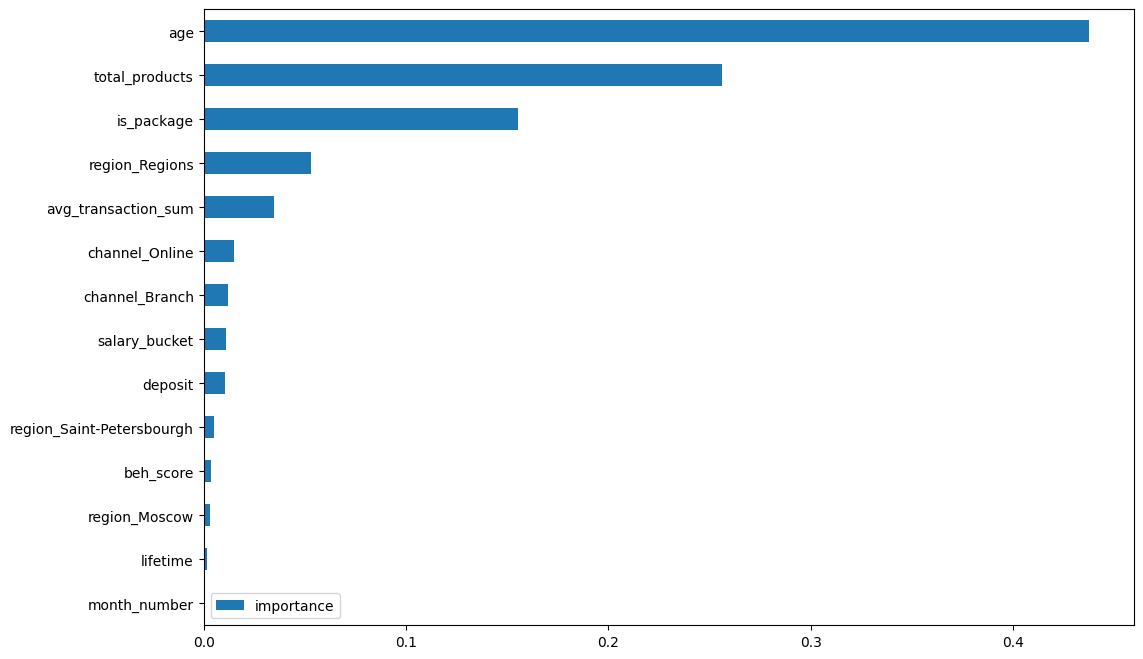

In [202]:
best_clf_GB = grid_search_gb.best_estimator_
imp = pd.DataFrame(best_clf_GB.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))     

In [203]:
feature_importances = best_clf_GB.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
fi_df_sort

,features,feature_importances
1,age,0.437604
5,total_products,0.256190
7,is_package,0.155532
10,region_Regions,0.052969
4,avg_transaction_sum,0.034724
13,channel_Online,0.015151
12,channel_Branch,0.011885
8,salary_bucket,0.010998
6,deposit,0.010591
11,region_Saint-Petersbourgh,0.005103


In [ ]:
#AdaBoostClassifier

In [204]:
from sklearn.ensemble import AdaBoostClassifier

classifier_AdaBoost = AdaBoostClassifier(learning_rate=0.01, random_state=32)

parameters = [{'n_estimators': [50,100,200,300,500]}] 
grid_search_AB = GridSearchCV(estimator = classifier_AdaBoost,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_AB.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(learning_rate=0.01, random_state=32),
             n_jobs=-1, param_grid=[{'n_estimators': [50, 100, 200, 300, 500]}],
             scoring='accuracy')

In [205]:
f1_score(y_test, grid_search_AB.best_estimator_.predict(X_test))

0.23809523809523808

In [206]:
roc_auc_score(y_test, grid_search_AB.best_estimator_.predict_proba(X_test)[:, 1])

0.694084143628387

In [207]:
roc_auc_score(y_test, grid_search_AB.best_estimator_.decision_function(X_test))

0.694084143628387

<AxesSubplot: >

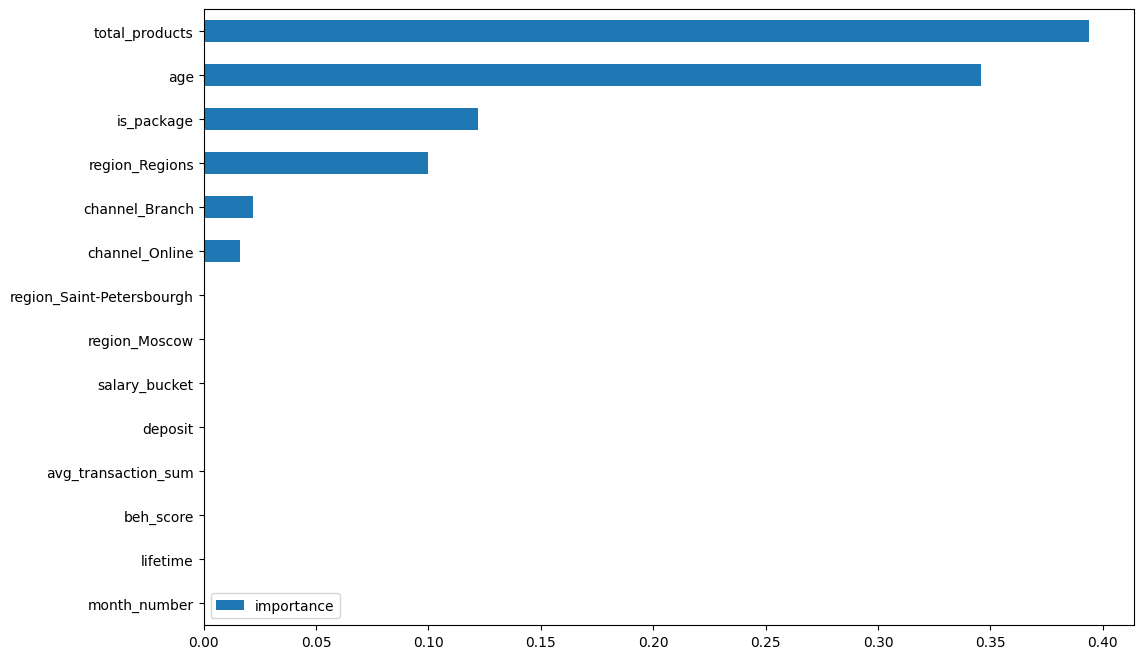

In [208]:
imp = pd.DataFrame(grid_search_AB.best_estimator_.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [209]:
best_boost_clf = grid_search_AB.best_estimator_
feature_importances = best_boost_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
fi_df_sort

,features,feature_importances
5,total_products,0.394
1,age,0.346
7,is_package,0.122
10,region_Regions,0.100
12,channel_Branch,0.022
13,channel_Online,0.016
0,month_number,0.000
2,lifetime,0.000
3,beh_score,0.000
4,avg_transaction_sum,0.000


In [ ]:
Вывод:выбор модели
    ExtraTreesClassifier по 0.43/0.71 - ф-скор/рокАук
    
    значимые параметры
    age, total_products, is_package, avg_transaction_sum
    
    Профиль клиента: я не психолог, могу только по весам модели сказать, что чем больше значимые параметры, представленные
    выше, тем вероятность получить 1 в Churn выше. Параметры расставлены по приоиету. Самый значимый - возраст,
    затем кол-во продуктов и т.д. Лучше посмотреть на график важности фич в разделе модели ExtraTreesClassifier.